Original shape: (150, 4)
Reduced shape: (150, 2)


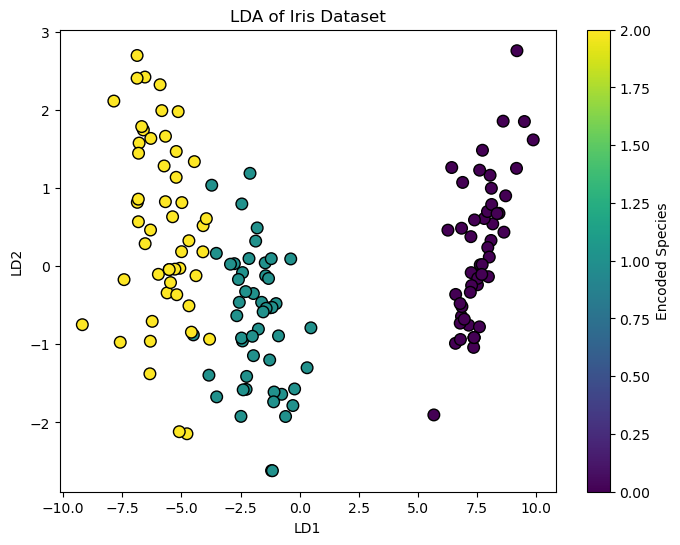

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load Iris dataset from CSV
df = pd.read_csv('IRIS.csv')

# Drop 'Id' column if exists
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

# Features and target
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = df['species'].values

# Encode target labels (species)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Initialize LDA with number of components (max is n_classes - 1, here 3 classes → 2 components)
lda = LinearDiscriminantAnalysis(n_components=2)

# Fit and transform the features to lower dimension
X_lda = lda.fit_transform(X, y_encoded)

print("Original shape:", X.shape)
print("Reduced shape:", X_lda.shape)

# Plot LDA results
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_encoded, cmap='viridis', edgecolor='k', s=70)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA of Iris Dataset')
plt.colorbar(label='Encoded Species')
plt.show()
